## Observations and Insights

# The sex of the test subjects was distrubted fairly even with 50.6% male and 49.4% female. 

# Treatment drugs Capomulin and Ramicane had the best reduction, therefore showing the most promising results.

# The correlation between Mouse Weight and Average Tumor Volume is 0.84, which is quite high. This means they both have a strong relationship with each other (i.e. as weight increases the tumor growth is higher). This is also evident from the linear regression (y=0.95x+21.55). This shows that tumor volume increases by more that 21.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'])

# Print to check merge
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = data.groupby(['Drug Regimen'])

# Find the average of all the rows in dataframe 
drug_means = drug_groups["Tumor Volume (mm3)"].mean()
drug_means_series = [value for value in drug_means]

drug_names = drug_means.index
drug_names_series = [value for value in drug_names]

# Find the median of all the rows in dataframe 
drug_medians = drug_groups["Tumor Volume (mm3)"].median()
drug_medians_series = [value for value in drug_medians]

# Return variance of all the rows in dataframe 
drug_var = drug_groups["Tumor Volume (mm3)"].var()
drug_var_series = [value for value in drug_var]

# Return standard deviation of all the rows in dataframe
drug_std = drug_groups["Tumor Volume (mm3)"].std()
drug_std_series = [value for value in drug_std]

# Calculate the standard error of the mean of all the rows in dataframe 
drug_sem = drug_groups["Tumor Volume (mm3)"].sem()
drug_sem_series = [value for value in drug_sem]

drug_summary = {"Mean":drug_means_series,
               "Median":drug_medians_series,
               "Variance": drug_var_series,
               "Standard Deviation": drug_std_series,
               "SEM": drug_sem_series}
drug_summary_df = pd.DataFrame(drug_summary, index = drug_names_series)
drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

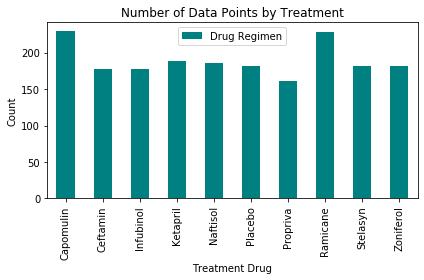

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Count the number of data points for each treatment type by calling in the previously grouped 'Drug Regimen' df
drug_groups_count = pd.DataFrame(drug_groups['Drug Regimen'].count())

# Create a bar chart from the 'Drug Regiman' df and add title with `DataFrame.plot()`
chart_df = drug_groups_count.plot(kind='bar', title='Number of Data Points by Treatment', color='teal')

# Name the x and y-axis labels
chart_df.set_xlabel('Treatment Drug')
chart_df.set_ylabel('Count')
plt.tight_layout()

# Save chart as png
plt.savefig('Pandas_Bar_Chart.png', dpi=200, bbox_inches='tight')

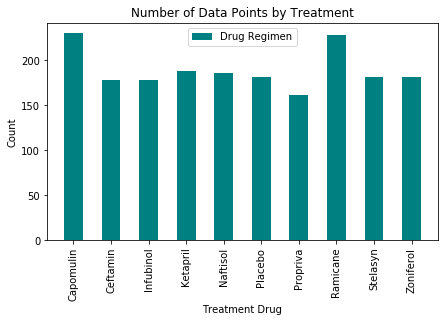

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(drug_groups_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,4))
plt.bar(x_axis, drug_groups_count['Drug Regimen'], color='teal', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_groups_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_groups_count['Drug Regimen'])*1.05)

# Set a title and labels
plt.title('Number of Data Points by Treatment')
plt.xlabel('Treatment Drug')
plt.ylabel('Count')

column_name = ['Drug Regimen']
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig('Pyplot_Bar_Chart.png', dpi=200, bbox_inches='tight')
plt.show()

## Pie plots

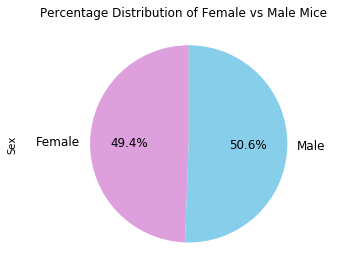

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a dataframe grouping-by the 'Sex' column
gender = data.groupby('Sex')

# Count the data points for each gender in dataframe
gender_count = pd.DataFrame(gender['Sex'].count())

# Create a pie chart based off of the group using `DataFrame.plot()`
gender_count.plot(kind='pie', subplots=True, \
                        title='Percentage Distribution of Female vs Male Mice',
                        startangle=90,\
                        autopct='%1.1f%%', 
                        fontsize=12, 
                        colors =['plum','skyblue'],
                        legend =False)

# Make the axis 'equal' for a round pie chart
plt.axis('equal')
plt.savefig('Pandas_Pie_Chart.png', dpi=200, bbox_inches='tight')
plt.show()

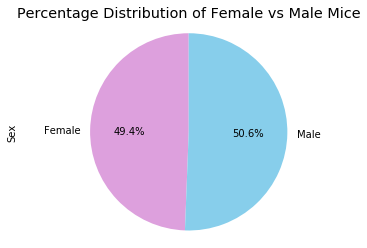

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Find the list of index values in the groupby dataframe for labels
genders = list(gender_count.index.values)

# Set the values of each section of the pie chart
gender_counts = gender_count['Sex']

# 'Pyplot' returns the percentages for the values, set colors
plt.pie(gender_counts, labels=genders, colors=['plum','skyblue'],
        autopct='%1.1f%%', startangle=90)
plt.rcParams['font.size'] = 12
plt.title('Percentage Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.savefig('Pyplot_Pie_Chart.png', dpi=200, bbox_inches='tight')
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Select four treatments to compare and add combine them in a list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Call in the merged dataframe and use the list to narrow the results down to the four treatments
treatments = data[data['Drug Regimen'].isin(treatment_list)]

# View the dataframe
treatments.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [11]:
# Now groupby 'Mouse ID' and use the .agg method to aggregate using one or more operations over the specified axis 
tumor_treatments = treatments.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column 
        tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
tumor_treatments

tumor_size
Drug Regimen Mouse ID            
Capomulin    b128          38.983
             b742          38.940
             f966          30.486
             g288          37.074
             g316          40.159
...                           ...
Ramicane     s508          30.276
             u196          40.668
             w678          43.166
             y449          44.183
             z578          30.639

[100 rows x 1 columns]

In [12]:
# Swap 'Drug Regimen' from rows to columns by using unstack
tumor_treatments_unstack = tumor_treatments.stack(level=0).unstack(level=0)
# Print result
tumor_treatments_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_size,NaN,NaN,67.973,NaN
a251,tumor_size,NaN,NaN,65.526,NaN
a275,tumor_size,NaN,62.999,NaN,NaN
a411,tumor_size,NaN,NaN,NaN,38.408
a444,tumor_size,NaN,NaN,NaN,43.048


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


# Do quartile calculations for each drug
for drug in treatment_list:
    quartiles = tumor_treatments_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    
    print(f"{drug} data:")
    print(f"IQR: {iqr}")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Median: {quartiles[0.5]} ")
    print(f"Potential outliers for {drug} are any values below {lower_bound} and above {upper_bound}.")
    print(f"---")
   

Capomulin data:
IQR: 7.78
Lower quartile: 32.38
Upper quartile: 40.16
Median: 38.12 
Potential outliers for Capomulin are any values below 20.71 and above 51.83.
---
Ramicane data:
IQR: 9.1
Lower quartile: 31.56
Upper quartile: 40.66
Median: 36.56 
Potential outliers for Ramicane are any values below 17.91 and above 54.31.
---
Infubinol data:
IQR: 11.48
Lower quartile: 54.05
Upper quartile: 65.53
Median: 60.16 
Potential outliers for Infubinol are any values below 36.83 and above 82.75.
---
Ceftamin data:
IQR: 15.58
Lower quartile: 48.72
Upper quartile: 64.3
Median: 59.85 
Potential outliers for Ceftamin are any values below 25.35 and above 87.67.
---


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Start by creating an empty list
boxplot_list = []

# For loop the list of four drug to select the same column names
for drug in treatment_list:
    boxplot_list.append(list(tumor_treatments_unstack[drug].dropna())) # Append the boxplot_list removing NaN values


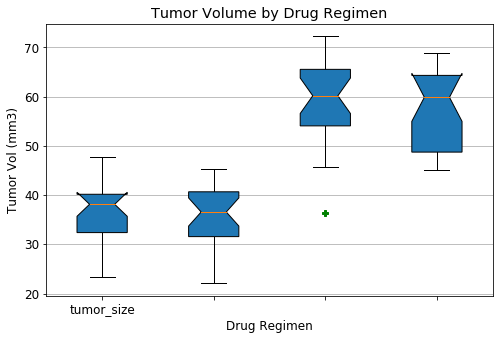

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - CONT

fig1, ax = plt.subplots(figsize=(8,5))

# Create notched shaped boxes and marker style
bplot = ax.boxplot(boxplot_list,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True, sym='gP')  # fill with color
        
# adding horizontal grid lines
ax.yaxis.grid(True)            

ax.set_title('Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
plt.xticks([1,2,3,4],tumor_treatments)

# Save the figure
plt.savefig('Box_and_Whisker_Plot.png', dpi=300)

plt.show()

## Line and scatter plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a dataframe for only the Capomulin data
capomulin_df = data.loc[data['Drug Regimen'] == 'Capomulin']

treatment_time = capomulin_df.groupby(['Timepoint']).agg(\
        # Generate mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# View the groupby dataframe 
treatment_time.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910


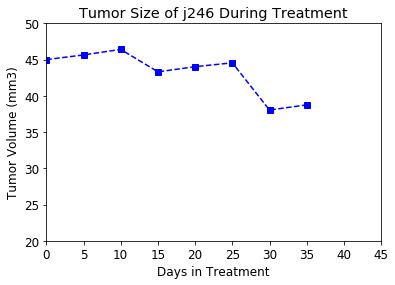

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin - CONT
mouse_1 = capomulin_df.loc[capomulin_df["Mouse ID"]=="j246"]

plt.plot(mouse_1["Timepoint"], mouse_1["Tumor Volume (mm3)"], "bs--")
plt.xlabel("Days in Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(20,50)
plt.title("Tumor Size of j246 During Treatment")

# Save the figure
plt.savefig('Line_Chart.png', dpi=300)

plt.show()

In [21]:
# Print dataframe from line plot above
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
mouse_id = capomulin_df.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        avg_vol=('Weight (g)', np.mean),\
        # Get the standard error of mean (SEM) of the 'Tumor Volume (mm3)' column
        vol_sem=('Tumor Volume (mm3)', np.mean)\
).round(3)
mouse_id.head(30)

,avg_vol,vol_sem
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


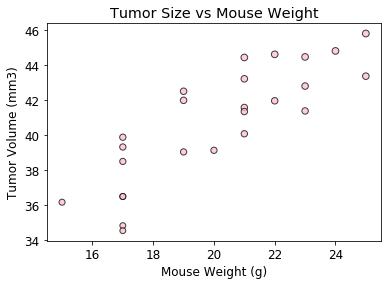

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen - CONT

#create scatter plot from the above dataframe
plt.scatter(
    mouse_id['avg_vol'],
    mouse_id['vol_sem'],
    marker='o',
    facecolors='pink',
    edgecolors='black',
    s=mouse_id['vol_sem'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Tumor Size vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig("Scatter_Plot.png", dpi=200)

plt.show()

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_id['avg_vol'],mouse_id['vol_sem'])
print(f"Weight & Tumor Size Correlation: {round(correlation[0],2)}")

Weight & Tumor Size Correlation: 0.84


R-squared: 0.8419461020261081
Equation: y = 0.95x + 21.55


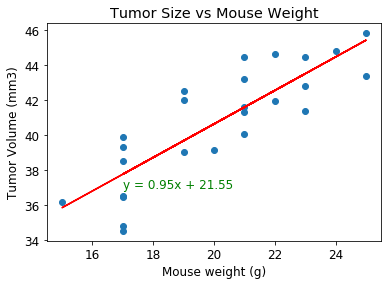

In [30]:
from scipy.stats import linregress

# Print out the r-squared value inside the chart
x_values = mouse_id['avg_vol']
y_values = mouse_id['vol_sem']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=12,color="green")
plt.title("Tumor Size vs Mouse Weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"R-squared: {rvalue}")
print(f"Equation: {line_eq}")

# Save the figure
plt.savefig("Scatter_Regression.png",dpi=200)

plt.show()